# Ford GoBike System Data Exploration

This document explores a data set that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in (2019).

<hr>

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

### Gather

In [2]:
# load in the datasets (01/2019 -> 12/2019) into a pandas dataframe
df = None

for filename in sorted(glob.glob('data/*.csv')):
    if df is None:
        df = pd.read_csv(filename)
    else:
        temp = pd.read_csv(filename)
        df = df.append(temp, ignore_index=True)

/Users/m/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/m/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/m/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<hr>

### Assess

In [3]:
df.shape

(2506983, 15)

In [4]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app


In [5]:
# random sample
df.sample(8)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1506664,1388,2019-08-31 04:52:58.6120,2019-08-31 05:16:07.2990,213.0,32nd St at Adeline St,37.823847,-122.281193,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,2807,Subscriber,Yes,NaN
1852426,187,2019-09-12 10:09:45.3340,2019-09-12 10:12:52.6900,114.0,Rhode Island St at 17th St,37.764478,-122.402570,102.0,Irwin St at 8th St,37.766883,-122.399579,2359,Customer,No,NaN
587764,437,2019-03-07 13:30:05.4500,2019-03-07 13:37:22.9720,245.0,Downtown Berkeley BART,37.870139,-122.268422,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,6439,Customer,No,NaN
285367,1270,2019-02-15 17:35:11.6360,2019-02-15 17:56:22.3780,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,70.0,Central Ave at Fell St,37.773311,-122.444293,5242,Subscriber,No,NaN
1716671,223,2019-09-30 16:55:21.4160,2019-09-30 16:59:04.5460,182.0,19th Street BART Station,37.809013,-122.268247,182.0,19th Street BART Station,37.809013,-122.268247,1956,Subscriber,No,NaN
1568540,903,2019-08-22 10:42:16.4770,2019-08-22 10:57:19.5780,75.0,Market St at Franklin St,37.773793,-122.421239,14.0,Clay St at Battery St,37.795001,-122.399970,3256,Subscriber,No,NaN
507993,177,2019-03-16 16:21:35.7250,2019-03-16 16:24:33.5220,50.0,2nd St at Townsend St,37.780526,-122.390288,81.0,Berry St at 4th St,37.775880,-122.393170,1102,Subscriber,No,NaN
1383417,5304,2019-07-07 12:47:58.7390,2019-07-07 14:16:23.0420,377.0,Fell St at Stanyan St,37.771951,-122.453705,377.0,Fell St at Stanyan St,37.771951,-122.453705,1654,Customer,No,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [7]:
# check for missing values
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [8]:
# check for duplicated rows
df.duplicated().sum()

0

In [9]:
# duration_sec summary statistics
pd.set_option('float_format', '{:f}'.format)
df.duration_sec.describe()

count   2506983.000000
mean        807.648330
std        1974.713981
min          60.000000
25%         359.000000
50%         571.000000
75%         887.000000
max      912110.000000
Name: duration_sec, dtype: float64

In [10]:
# duration_sec sorted in descending order
df.duration_sec.sort_values(ascending=False)

2481276    912110
2385537     86230
1265667     86217
644460      86114
1741971     86114
            ...  
1486204        60
1415886        60
1415832        60
1449824        60
1421086        60
Name: duration_sec, Length: 2506983, dtype: int64

912,110 is a very high value compared to the other values, so it will be removed later.

In [11]:
# unique user types
df.user_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [12]:
# number of unique start stations
df.start_station_name.nunique()

446

In [13]:
# number of unique end stations
df.end_station_name.nunique()

446

In [14]:
# number of unique bikes
df.bike_id.nunique()

11070

#### Quality
Erroneous data types (*start_time, end_time, bike_id, and user_type*).

#### Not needed columns
*bike_share_for_all_trip, rental_access_method, start_station_id, end_station_id, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude*. 

<hr>

### Clean

In [15]:
# make a copy of the data
df_clean = df.copy()

**Not needed columns: *bike_share_for_all_trip, rental_access_method, start_station_id, end_station_id, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude*.**

##### Define

Drop (*bike_share_for_all_trip, rental_access_method, start_station_id, end_station_id, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude*).

##### Code

In [16]:
df_clean.drop(['bike_share_for_all_trip', 'rental_access_method', 'start_station_id', 'end_station_id',
              'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
               'end_station_longitude'], axis=1, inplace=True)

##### Test

In [17]:
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_name',
 'end_station_name',
 'bike_id',
 'user_type']

**Erroneous data types (*start_time, end_time, bike_id, and user_type*).**

##### Define

Convert (*start_time, end_time*) to datetime data type, (*bike_id*) to object/string data type, and (*user_type*) to categorical data type.

##### Code

In [18]:
# to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

# to object/string
df_clean.bike_id = df_clean.bike_id.astype('str')

# to category
df_clean.user_type = df_clean.user_type.astype('category')

##### Test

In [19]:
df_clean.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
end_station_name              object
bike_id                       object
user_type                   category
dtype: object

In [20]:
df_clean.shape

(2506983, 7)

### What is the structure of your dataset?
After a simple cleaning, the dataset contains 2,506,983 rows and 7 columns:
- duration_sec (int).
- start_time (datetime).
- end_time (datetime).
- start_station_name (object) - *446 unique stations*.
- end_station_name (object) - *446 unique stations*.
- bike_id (object) - *11,070 unique bikes*.
- user_type (category) - *Subscriber, and Customer*.


### What is/are the main feature(s) of interest in your dataset?
- *start_time*, to find bikes usage by (month/week day/hour).
- *user_type*, to find the differences in bikes usage between subscribers and customers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
All remaining  features, since not neeeded columns were dropped during the cleaning process. 

<hr>

In [21]:
# remove 912,110
df_clean = df_clean[df_clean.duration_sec != df_clean.duration_sec.max()]

# test (not 912,110)
df_clean.duration_sec.max()

86230

In [22]:
# new useful columns

# from start_time
df_clean['start_month'] = df_clean.start_time.dt.month
df_clean['start_weekday'] = df_clean.start_time.dt.weekday 
df_clean['start_hour'] = df_clean.start_time.dt.hour

# from end_time
df_clean['end_hour'] = df_clean.end_time.dt.hour

# from duration_sec
df_clean['duration_minutes'] = df_clean['duration_sec']/60

# test
df_clean.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
end_station_name              object
bike_id                       object
user_type                   category
start_month                    int64
start_weekday                  int64
start_hour                     int64
end_hour                       int64
duration_minutes             float64
dtype: object

In [23]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,start_month,start_weekday,start_hour,end_hour,duration_minutes
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,4861,Subscriber,1,3,17,16,1347.083333
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,Cyril Magnin St at Ellis St,Valencia St at 24th St,5506,Subscriber,1,3,20,15,1098.333333
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,Downtown Berkeley BART,65th St at Hollis St,2717,Customer,1,3,18,11,1043.883333
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,Church St at Duboce Ave,Grove St at Divisadero,4557,Customer,1,3,19,8,744.666667
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,Steuart St at Market St,The Embarcadero at Bryant St,2100,Customer,1,3,14,7,1011.816667


In [24]:
# labels to use in plots
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# color to use in plots 
base_color = sb.color_palette()[0]

<hr>

## Univariate Exploration

##### duration_minutes

I will use *duration_minutes* instead of *duration_sec* because minutes are more clear than seconds.

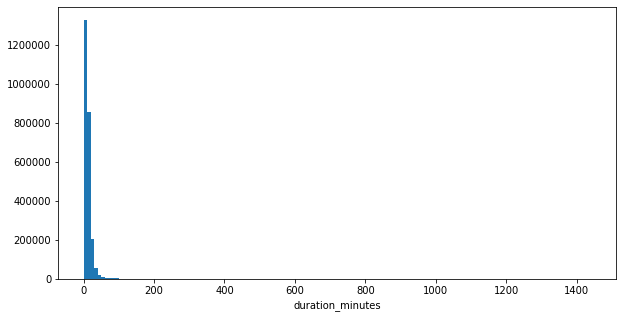

In [25]:
# plot a histogram 
plt.figure(figsize=[10,5])
bin_edges = np.arange(0, df_clean.duration_minutes.max()+10, 10)
plt.hist(data = df_clean, x = 'duration_minutes', bins = bin_edges)
plt.xlabel('duration_minutes');

The data follows an approximately log-normal distribution, lots of points with low values, with a very long tail of data points with large values. Thus, a logarithmic scale transformation will be applied.

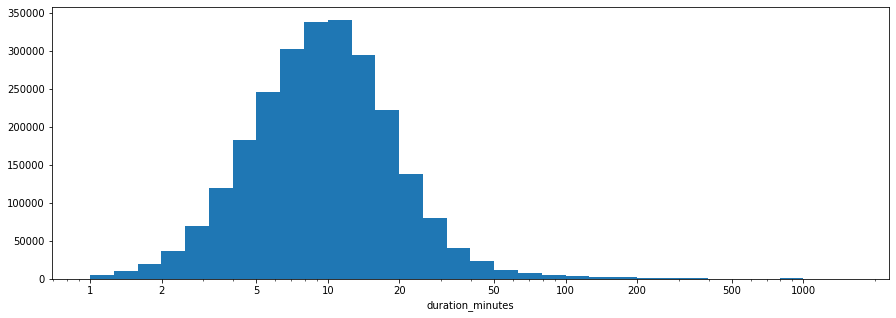

In [26]:
# plot a histogram with logarithmic scale transformation
plt.figure(figsize=[15,5])
bin_edges = 10 ** np.arange(0.0, np.log10(df_clean.duration_minutes.max())+0.1, 0.1)
plt.hist(data = df_clean, x = 'duration_minutes', bins = bin_edges)
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('duration_minutes');

We can see from the histogram that most rides took about (8-12) minutes. And very few rides lasted more than one hour (60 minutes). 

##### start_month

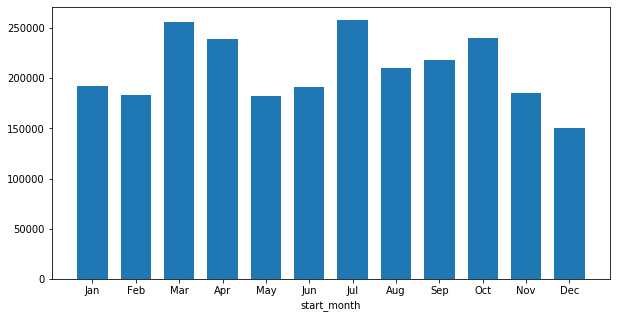

In [27]:
# plot a histogram with gaps between bars
plt.figure(figsize=[10,5])
bin_edges = np.arange(0.5, 12.5+1, 1)
plt.hist(data = df_clean, x = 'start_month', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(1, 12+1, 1), month_labels)
plt.xlabel('start_month');

Based on the plot, most rides in 2019 were in March and July, with about 250,000 rides for each.<br> On the other hand, December had the lowest number of rides with about 150,000.

##### start_weekday

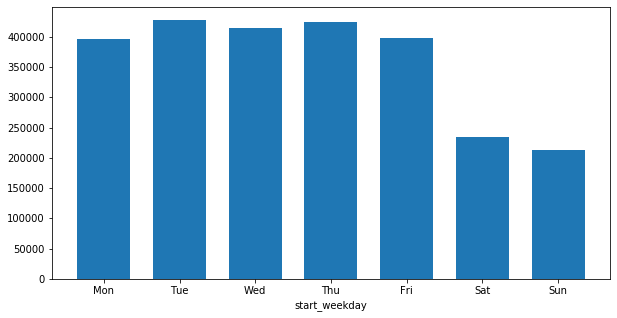

In [28]:
# plot a histogram with gaps between bars
plt.figure(figsize=[10,5])
bin_edges = np.arange(-0.5, 6.5+1, 1)
plt.hist(data = df_clean, x = 'start_weekday', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.xlabel('start_weekday');

It's clear from the chart, bikes were mostly used on work days (Monday-Friday).

##### start_hour

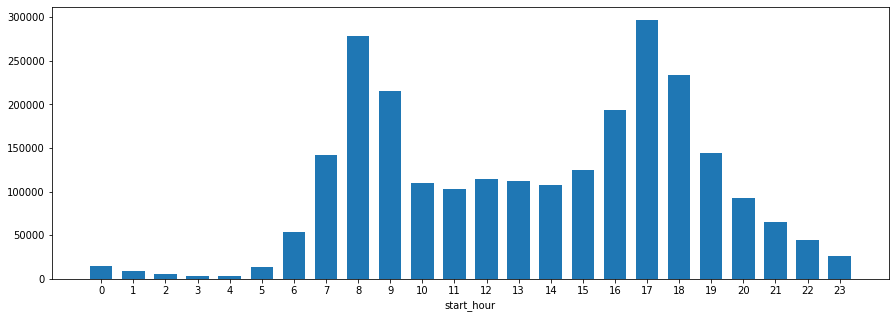

In [29]:
# plot a histogram with gaps between bars
plt.figure(figsize=[15,5])
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist(data = df_clean, x = 'start_hour', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel('start_hour');

We can see that the distribution is roughly bimodal (has two peaks) at 8 and 17. This might be because most work days start and end around this time.

##### end_hour

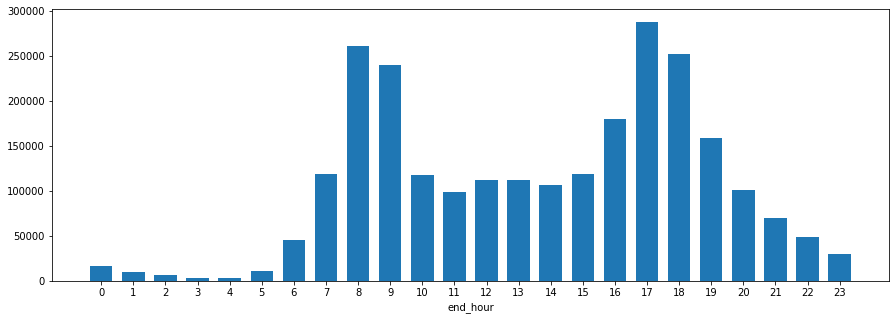

In [30]:
# plot a histogram with gaps between bars
plt.figure(figsize=[15,5])
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist(data = df_clean, x = 'end_hour', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel('end_hour');

The plot looks a lot like the plot above (start_hour), since we saw before that most rides didn't exceed an hour, meaning that the ride started and ended in the same hour.

##### user_type

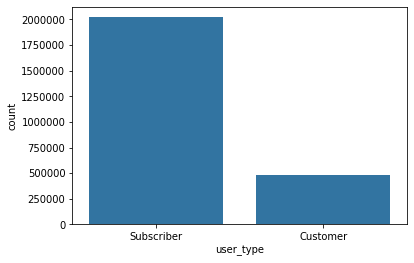

In [31]:
# plot a bar chart
user_cat_order = df_clean['user_type'].value_counts().index
sb.countplot(data = df_clean, x = 'user_type', color = base_color, order = user_cat_order);

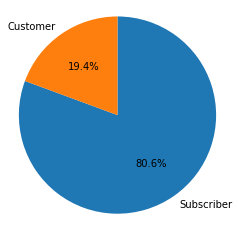

In [32]:
# plot a pie chart
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square');

It's pretty clear, most rides in 2019 were made by subscribers.

##### start_station_name

Since there are a lot of start stations (446), I will just check the top 10.

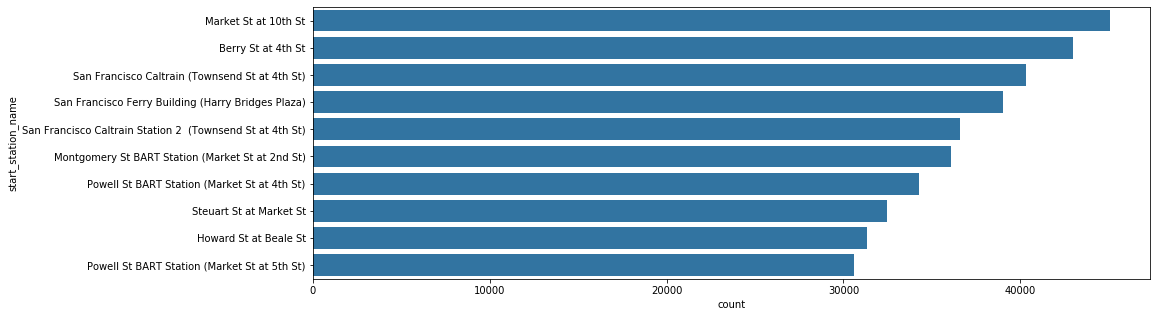

In [33]:
# plot a horizontal bar chart
cat_order = df_clean['start_station_name'].value_counts().index[:10]
plt.figure(figsize=[15,5])
sb.countplot(data = df_clean, y = 'start_station_name', color = base_color, order = cat_order);

We can see that (Market St at 10th St) and (Berry St at 4th St) were the most common start stations.

##### end_station_name

Since there are a lot of end stations (446), I will just check the top 10.

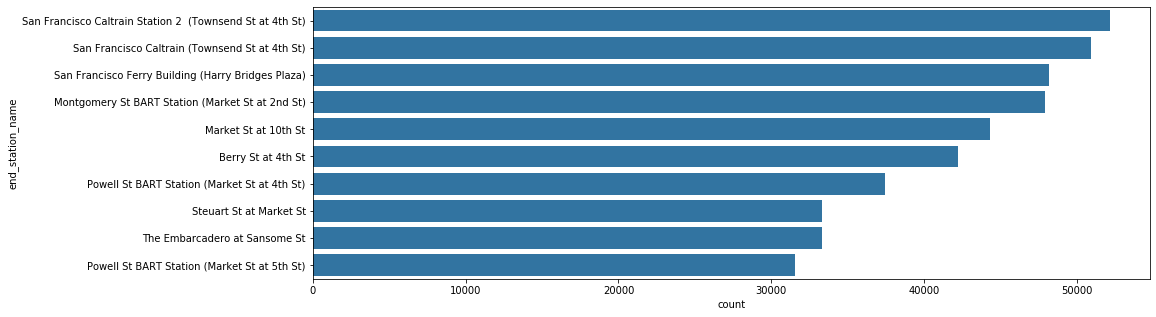

In [34]:
# plot a horizontal bar chart
cat_order = df_clean['end_station_name'].value_counts().index[:10]
plt.figure(figsize=[15,5])
sb.countplot(data = df_clean, y = 'end_station_name', color = base_color, order = cat_order);

(San Francisco Caltrain Station 2 - Townsend St at 4th St) and (San Francisco Caltrain - Townsend St at 4th St) were the most common end stations.

##### bike_id

Since there are a lot of bikes (11,070), I will just check the top 15.

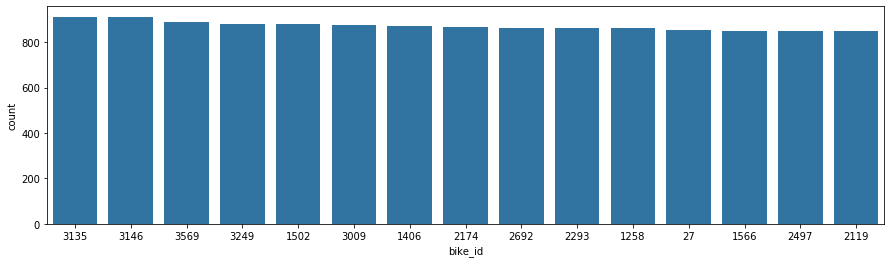

In [35]:
# plot a bar chart
cat_order = df_clean['bike_id'].value_counts().index[:15]
plt.figure(figsize=[15,4])
sb.countplot(data = df_clean, x = 'bike_id', color = base_color, order = cat_order);

It seems like the maximum number of uses for a single bike was around 850.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
most rides took about (8-12) minutes. And very few rides lasted more than one hour.

*start_time*
- Based on the month: most rides were in March and July. On the other hand, December had the lowest number of rides.
- Based on week day: bikes were mostly used on work days (Monday-Friday).
- Based on starting hour: the distribution is roughly bimodal (has two peaks) at 8 and 17.

*user_type*
- The majority of bike users in 2019 were subscribers (80.6%).

A logarithmic scale transformation was applied on *duration_minutes* hist plot, because the data follows an approximately log-normal distribution, lots of points with low values, with a very long tail of data points with large values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Nothing seemed unusual, just that most rides didn't last for a long period.

New columns were created:
- *start_month*: to store the month number from *start_time*.
- *start_weekday*: to store week day number from *start_time*.
- *start_hour*: to store hour number from *start_time*.
- *end_hour*: to store hour number from *end_time*.
- *duration_minutes*: to store the duration in minutes. (was created because I believe that minutes are more clear than seconds).

<hr>

## Bivariate Exploration

##### user_type vs. duration_minutes

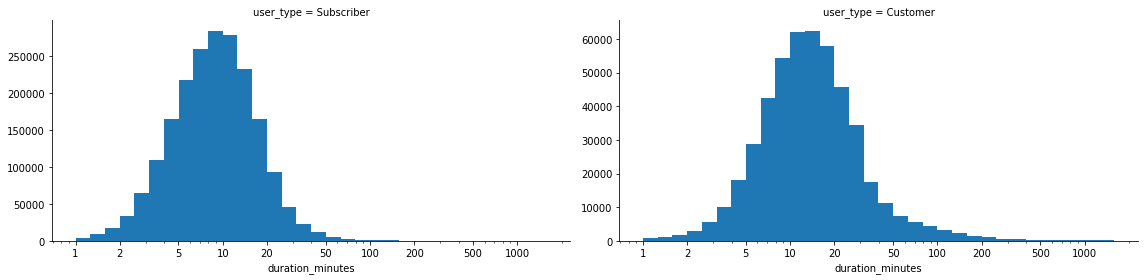

In [36]:
# facetting histograms of duration_minutes against user_type
bin_edges = 10 ** np.arange(0.0, np.log10(df_clean.duration_minutes.max())+0.1, 0.1)
g = sb.FacetGrid(data = df_clean, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
g.map(plt.hist, "duration_minutes", bins = bin_edges)
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs);

It seems like subscribers mostly rode bikes for (8-12) minutes, while customers mostly rode them for (10-19) minutes.<br>Also, customers rides were more likely to last more than one hour compared to subscribers. 

##### user_type vs. start_month

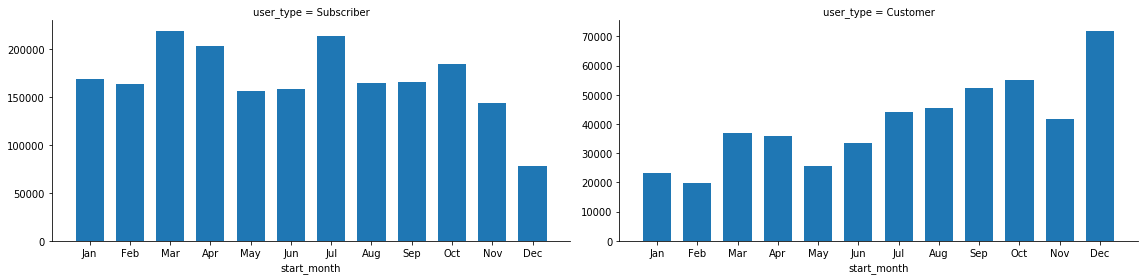

In [37]:
# facetting histograms of start_month against user_type
bin_edges = np.arange(0.5, 12.5+1, 1)
g = sb.FacetGrid(data = df_clean, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
g.map(plt.hist, "start_month", bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(1, 12+1, 1), month_labels);

Subscribers used bikes mostly in March and July, while customers mostly used them in December.

##### user_type vs. start_weekday

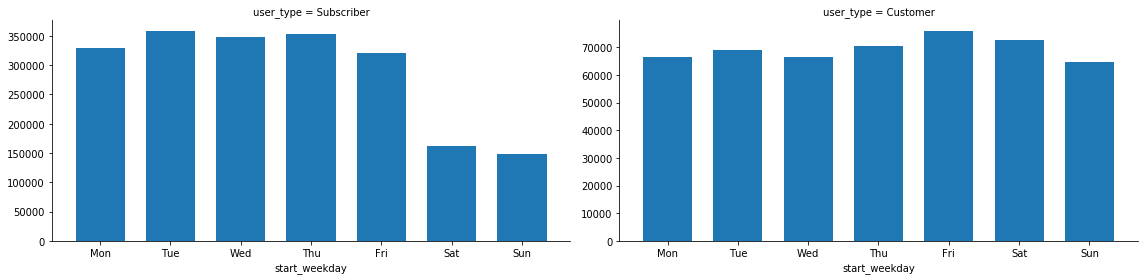

In [38]:
# facetting histograms of start_weekday against user_type
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sb.FacetGrid(data = df_clean, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
g.map(plt.hist, 'start_weekday', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 6+1, 1), weekday_labels);

Subscribers mostly used bikes on workdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a slight increment on Friday and Saturday. 

##### user_type vs. start_hour

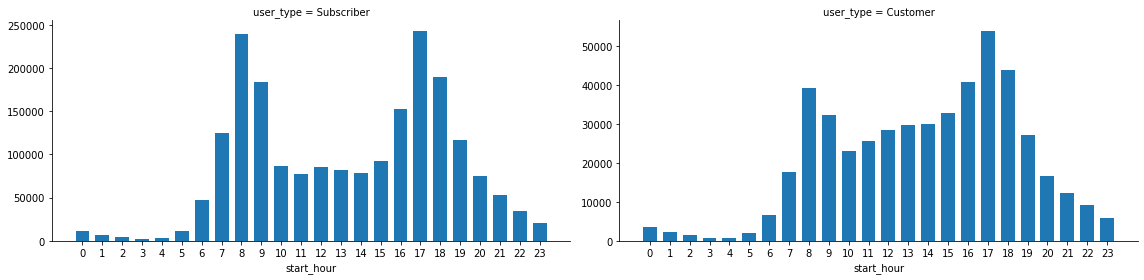

In [39]:
# facetting histograms of start_hour against user_type
bin_edges = np.arange(-0.5, 23.5+1, 1)
g = sb.FacetGrid(data = df_clean, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
g.map(plt.hist, 'start_hour', bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 23+1, 1));

Most rides for subscribers started at 8 or 17. While most customer rides started at 17 or 18.

#####  duration_minutes vs. start_month

Since most rides didn't exceed an hour, I will just keep the rides with duration_minutes <= 60 in this part, to get a more accurate duration_minutes mean.

In [40]:
df_clean_60_or_less = df_clean[df_clean.duration_minutes <= 60]

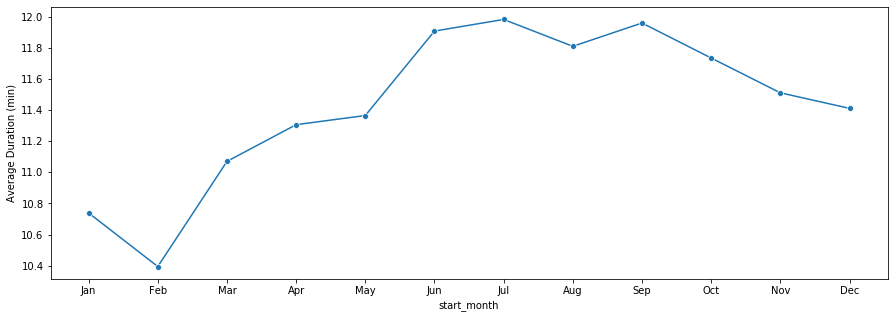

In [41]:
month_avg_mint = df_clean_60_or_less.groupby('start_month').duration_minutes.mean()

# plot a line plot
plt.figure(figsize=[15,5])
sb.lineplot(x=month_avg_mint.index, y=month_avg_mint, marker='o')
plt.xticks(np.arange(1,13), month_labels)
plt.ylabel('Average Duration (min)');

On average rides from June to October lasted longer than the other months.

#####  duration_minutes vs. start_weekday

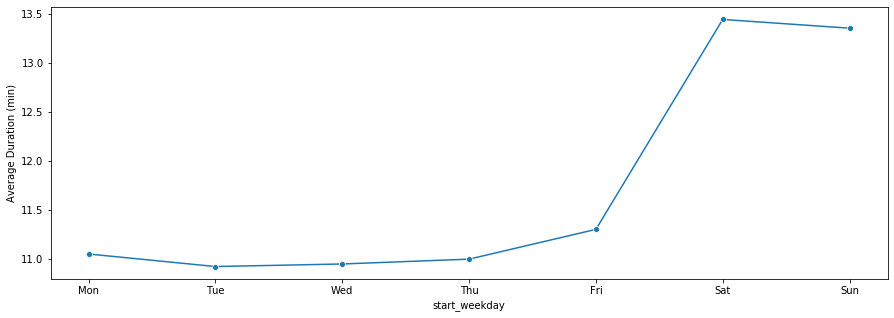

In [42]:
weekday_avg_mint = df_clean_60_or_less.groupby('start_weekday').duration_minutes.mean()

# plot a line plot
plt.figure(figsize=[15,5])
sb.lineplot(x=weekday_avg_mint.index, y=weekday_avg_mint, marker='o')
plt.xticks(np.arange(0,7), weekday_labels)
plt.ylabel('Average Duration (min)');

On average rides on the weekend (Saturday and Sunday) lasted longer than the other days.

##### bike_id vs. start_month

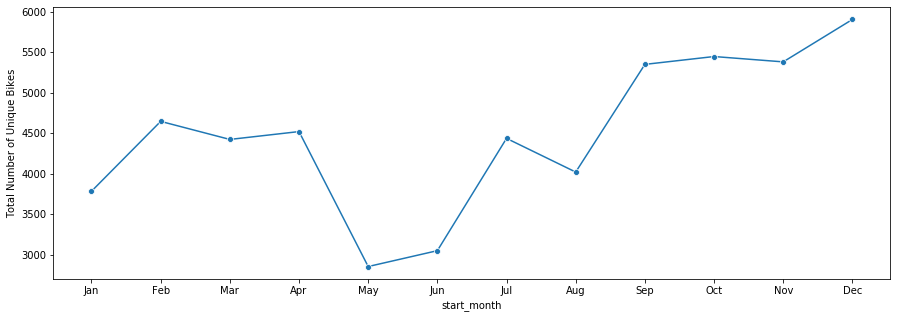

In [43]:
number_of_bikes = df_clean.groupby('start_month').bike_id.nunique()

# plot a line plot
plt.figure(figsize=[15,5])
sb.lineplot(x=number_of_bikes.index, y=number_of_bikes, marker='o')
plt.xticks(np.arange(1,13), month_labels)
plt.ylabel('Total Number of Unique Bikes');

December had the highest number of unique bikes used, and May had the lowest.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
**Subscribers and customers bikes usage was different:**
- Subscribers mostly rode bikes for (8-12) minutes, while customers mostly rode them for (10-19) minutes.
- Customers rides were more likely to last more than one hour compared to subscribers.
- Subscribers used bikes mostly in March and July, while customers mostly used them in December.
- Subscribers mostly used bikes on workdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a slight increment on Friday and Saturday.
- Most rides for subscribers started at 8 or 17. While most customer rides started at 17 or 18.

**Average duration in minutes:**
- Based on the month: on average rides from June to October lasted longer than the other months.
- Based on week day: on average rides on the weekend (Saturday and Sunday) lasted longer than the other days.

**Total number of unique bikes:**
- December had the highest number of unique bikes used, and May had the lowest.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
No.

<hr>

## Multivariate Exploration

#####  duration_minutes vs. start_month (for each user_type)

Since most rides didn't exceed an hour, I will just keep the rides with duration_minutes <= 60 in this part, to get a more accurate duration_minutes mean.

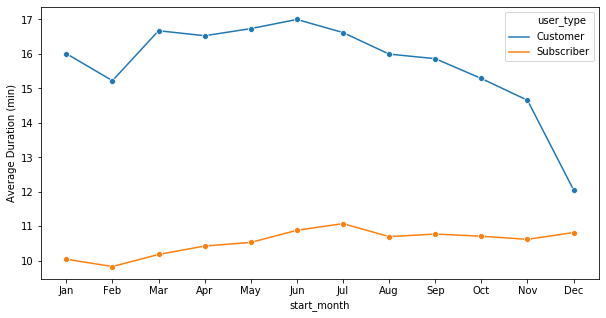

In [44]:
user_month_avg_mint = df_clean_60_or_less.groupby(['user_type','start_month']).duration_minutes.mean()
user_month_avg_mint = user_month_avg_mint.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = user_month_avg_mint, x='start_month', y='duration_minutes', hue='user_type', marker='o')
plt.xticks(np.arange(1,13), month_labels)
plt.ylabel('Average Duration (min)');

On average customers rides lasted longer than subscribers rides in every month.

#####  duration_minutes vs. start_weekday (for each user_type)

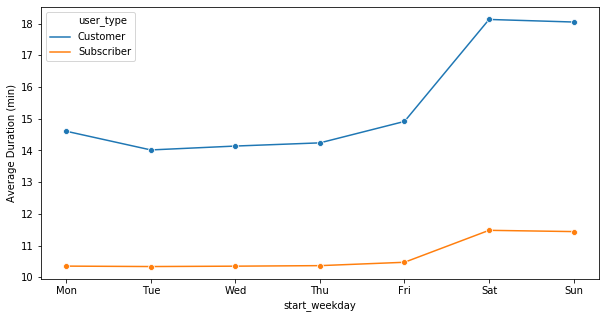

In [45]:
user_weekday_avg_mint = df_clean_60_or_less.groupby(['user_type','start_weekday']).duration_minutes.mean()
user_weekday_avg_mint = user_weekday_avg_mint.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = user_weekday_avg_mint, x='start_weekday', y='duration_minutes', hue='user_type', marker='o')
plt.xticks(np.arange(0,7), weekday_labels)
plt.ylabel('Average Duration (min)');

On average customers rides lasted longer than subscribers rides on every week day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- On average customers rides lasted longer than subscribers rides in every month.
- On average customers rides lasted longer than subscribers rides on every week day.

### Were there any interesting or surprising interactions between features?
Yes, customers were more likely to use bikes for a longer period than subscribers.

<hr>

In [46]:
# save df_clean to a file named 2019-baywheels-tripdata.csv with no index column
df_clean.to_csv('2019-baywheels-tripdata.csv', index=False)